In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
df.shape

(29531, 16)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
# Extracting Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Dropping Date column
df.drop(columns=['Date'], inplace=True)

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [8]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
df.isna().sum()

City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
Year             0
Month            0
Day              0
dtype: int64

In [10]:
df['AQI'].fillna(method='ffill', inplace=True)
df['AQI_Bucket'].fillna(method='ffill', inplace=True)

C:\Users\Vinit Solanki\AppData\Local\Temp\ipykernel_19100\1682559575.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AQI'].fillna(method='ffill', inplace=True)
C:\Users\Vinit Solanki\AppData\Local\Temp\ipykernel_19100\1682559575.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AQI_Bucket'].fillna(method='ffill', inplace=True)


In [11]:
# Handling outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
# Capping extreme values beyond 1.5*IQR
df[num_cols] = np.clip(df[num_cols], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

In [12]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,25.39,75.715,0.00,0.02,0.98,118.0,NaN,2015,1,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.060,3.68,5.50,0.98,118.0,NaN,2015,1,2
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,2.64,25.39,30.700,5.69,13.13,0.98,118.0,NaN,2015,1,3
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.080,4.43,10.14,0.98,118.0,NaN,2015,1,4
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,2.64,25.39,39.310,5.69,13.13,0.98,118.0,NaN,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.300,2.24,12.07,0.98,41.0,Good,2020,6,27
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.140,0.74,2.21,0.98,70.0,Satisfactory,2020,6,28
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.960,0.01,0.01,0.98,68.0,Satisfactory,2020,6,29
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.300,0.00,0.00,0.98,54.0,Satisfactory,2020,6,30


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['City'] = le.fit_transform(df['City'])
df['AQI_Bucket'] = le.fit_transform(df['AQI_Bucket'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
df.to_csv("cleaned_aqi_dataset.csv", index=False)
print("Preprocessing complete. Cleaned dataset saved.")

Preprocessing complete. Cleaned dataset saved.


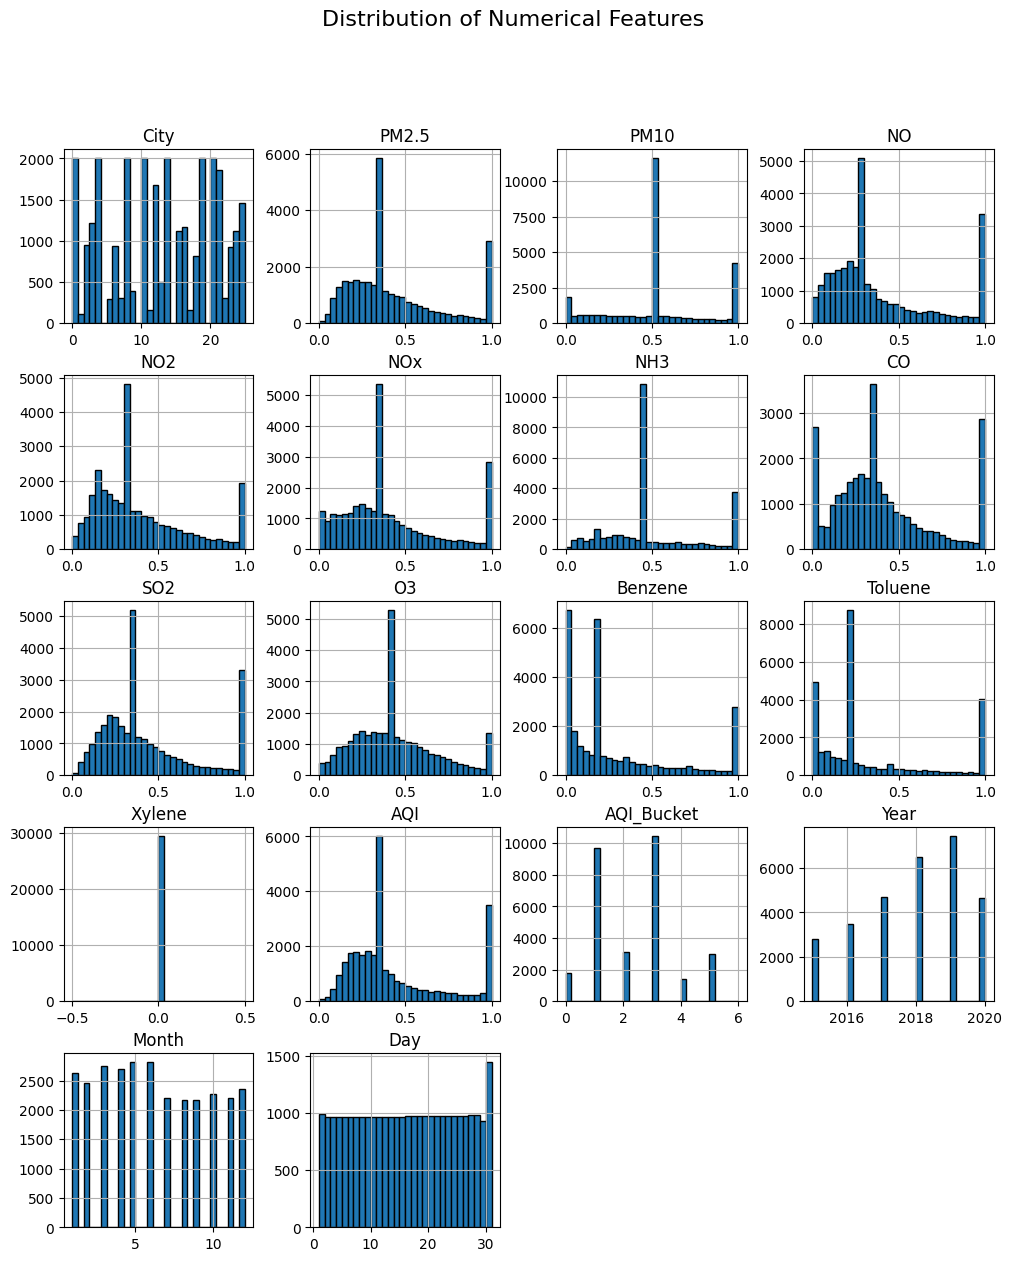

In [16]:
df = pd.read_csv("cleaned_aqi_dataset.csv")

# Plot histograms
df.hist(figsize=(12, 14), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

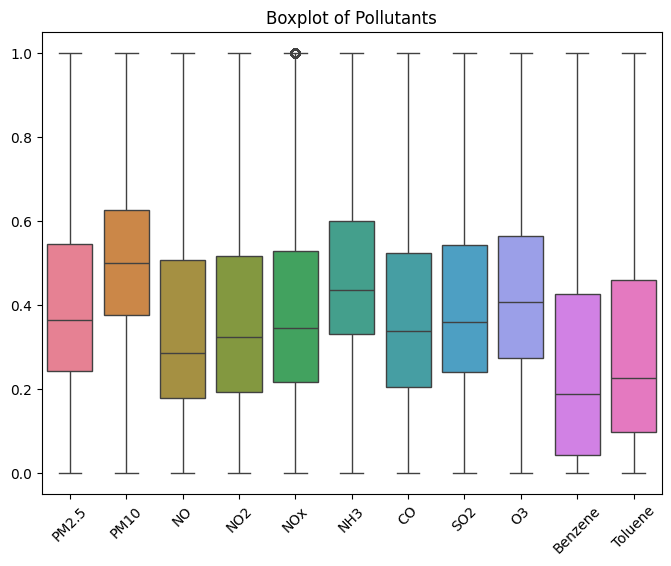

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']])
plt.xticks(rotation=45)
plt.title("Boxplot of Pollutants")
plt.show()

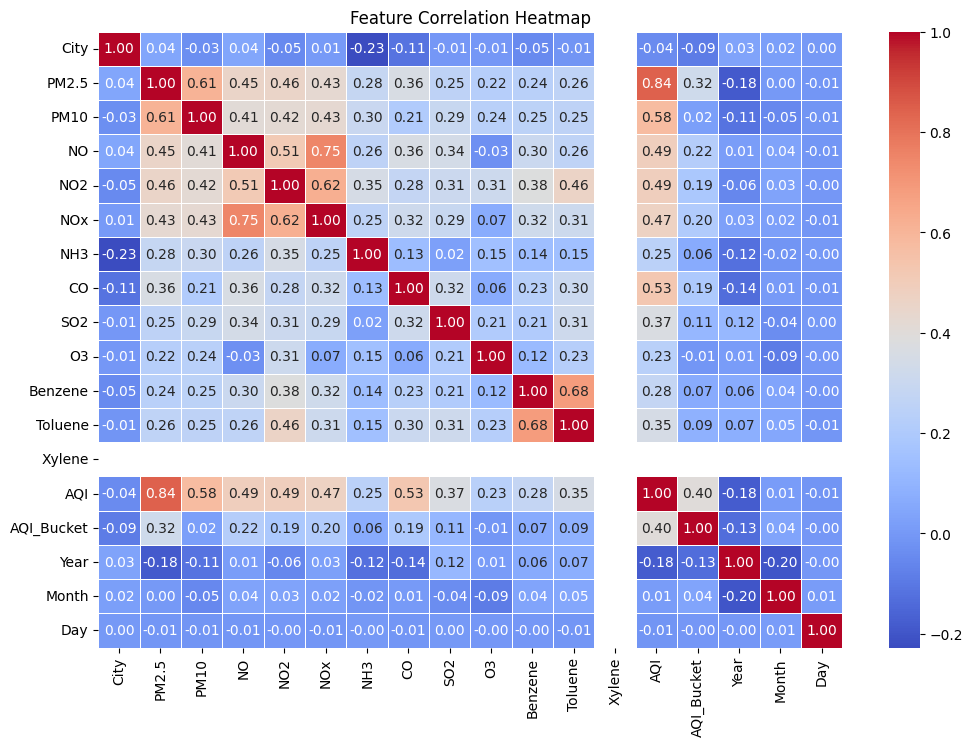

In [18]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

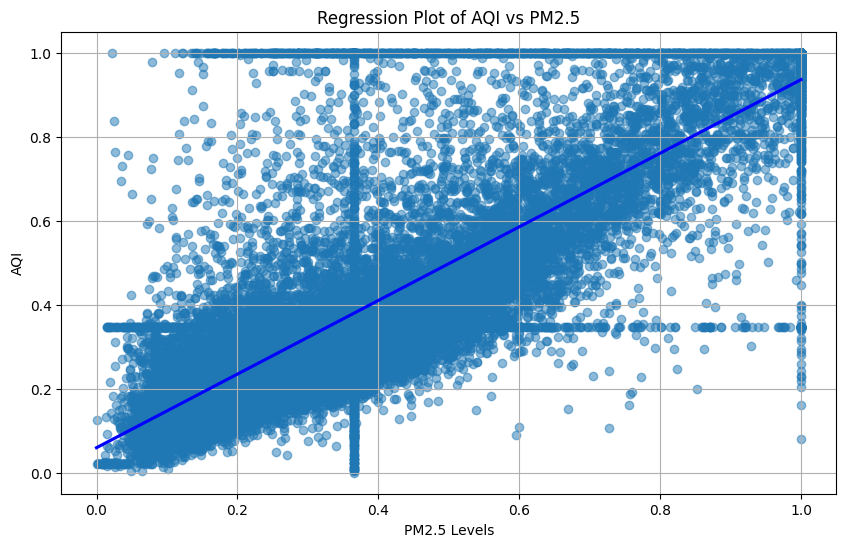

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["PM2.5"], y=df["AQI"], scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.title("Regression Plot of AQI vs PM2.5")
plt.xlabel("PM2.5 Levels")
plt.ylabel("AQI")
plt.grid()
plt.show()

Model Training, Testing and Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
df = pd.read_csv("cleaned_aqi_dataset.csv")

In [28]:
df.isna().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

In [29]:
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features]
y = df["AQI"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Model Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)

Model Coefficients: [ 0.68831099  0.06080469  0.01986983  0.03241078  0.02733908 -0.02293229
  0.21323176  0.07268851  0.02864304 -0.02001737  0.0458229   0.        ]
Intercept: -0.049306967936319945


In [33]:
y_pred = mlr_model.predict(X_test)

# Comparing actual vs predicted values
comparison_df = pd.DataFrame({"Actual AQI": y_test, "Predicted AQI": y_pred})
print(comparison_df.head())

       Actual AQI  Predicted AQI
22593    0.347107       0.292604
22459    0.347107       0.292604
24213    0.409917       0.417660
25301    0.585124       0.633198
20886    1.000000       0.861505


In [34]:
# evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

Mean Absolute Error (MAE): 0.08645648425152186
Mean Squared Error (MSE): 0.015356942869331291
Root Mean Squared Error (RMSE): 0.12392313290637584
R-Squared (R²): 0.7912012234170357


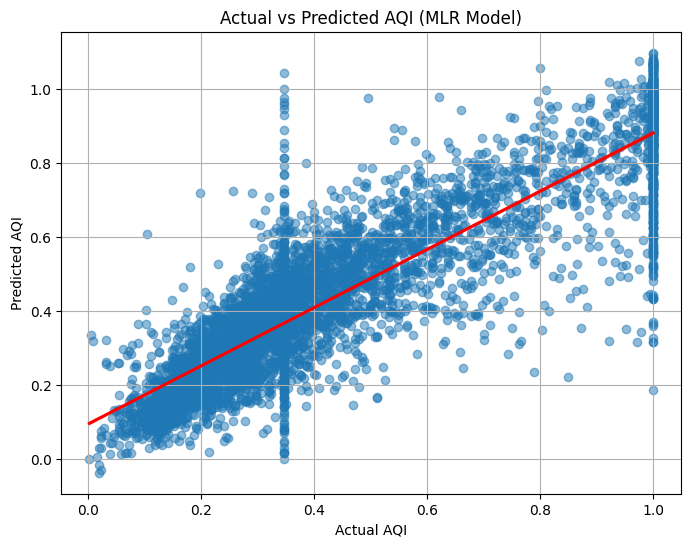

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (MLR Model)")
plt.grid()
plt.show()

In [42]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
# Group by week and take the mean of AQI and pollutants
df_weekly = df.groupby(pd.Grouper(key="Date", freq="W")).mean()
df_weekly.reset_index(inplace=True)
print(df_weekly.head())

        Date       City     PM2.5      PM10        NO       NO2       NOx  \
0 2015-01-04  10.320000  0.453063  0.571680  0.316253  0.300138  0.345303   
1 2015-01-11  10.714286  0.455947  0.571971  0.449056  0.437587  0.413112   
2 2015-01-18  10.714286  0.455947  0.571971  0.453405  0.399916  0.442167   
3 2015-01-25  10.714286  0.455307  0.568108  0.365058  0.320434  0.323909   
4 2015-02-01  10.714286  0.489314  0.567789  0.399803  0.360025  0.384638   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0  0.457856  0.587576  0.557699  0.341132  0.315431  0.434943     0.0   
1  0.525350  0.576763  0.553312  0.348671  0.399591  0.449461     0.0   
2  0.504366  0.607684  0.519556  0.374302  0.423012  0.492376     0.0   
3  0.456407  0.669759  0.468503  0.385278  0.374735  0.343193     0.0   
4  0.462746  0.602891  0.419091  0.446118  0.354865  0.319412     0.0   

        AQI  AQI_Bucket    Year     Month        Day  
0  0.428760    2.960000  2015.0  1.000000  

In [44]:
df_monthly = df.groupby(["Year", "Month"]).mean().reset_index()
print(df_monthly.head())

   Year  Month       City     PM2.5      PM10        NO       NO2       NOx  \
0  2015      1  10.668224  0.460138  0.570095  0.402333  0.367129  0.382184   
1  2015      2  10.714286  0.505987  0.565914  0.368419  0.385731  0.408468   
2  2015      3  10.714286  0.484341  0.531824  0.347521  0.361118  0.409723   
3  2015      4  10.714286  0.476992  0.552556  0.340082  0.350837  0.387104   
4  2015      5  10.714286  0.454594  0.571971  0.329663  0.366827  0.383241   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0  0.485398  0.614309  0.497481  0.380341  0.378932  0.404734     0.0   
1  0.565124  0.586097  0.423747  0.450952  0.353368  0.397699     0.0   
2  0.497705  0.655966  0.429556  0.498954  0.403943  0.486198     0.0   
3  0.511201  0.667695  0.487529  0.491527  0.309105  0.318906     0.0   
4  0.545497  0.695311  0.494591  0.492375  0.380731  0.286729     0.0   

        AQI  AQI_Bucket        Day                          Date  
0  0.444898    2.79

In [46]:
df_yearly = df.groupby("Year").mean().reset_index()
print(df_yearly.head())

   Year       City     PM2.5      PM10        NO       NO2       NOx  \
0  2015  11.512674  0.466555  0.545617  0.368226  0.341410  0.424135   
1  2016  12.687752  0.499026  0.534097  0.372255  0.411267  0.377150   
2  2017  13.192152  0.476273  0.532346  0.358802  0.410039  0.323884   
3  2018  13.261938  0.451088  0.558182  0.415845  0.447820  0.469594   
4  2019  13.127182  0.404079  0.503596  0.401480  0.384928  0.437307   

        NH3        CO       SO2        O3   Benzene   Toluene  Xylene  \
0  0.549798  0.597307  0.392456  0.418900  0.289940  0.321066     0.0   
1  0.539753  0.414720  0.363262  0.456982  0.280702  0.308659     0.0   
2  0.504195  0.269754  0.376613  0.429425  0.215831  0.233830     0.0   
3  0.480581  0.422969  0.480160  0.448546  0.318507  0.378199     0.0   
4  0.450813  0.411425  0.477297  0.427629  0.324416  0.390484     0.0   

        AQI  AQI_Bucket     Month        Day                          Date  
0  0.505360    2.433417  6.788290  15.761871 2015-0

In [47]:
df_weekly.to_csv("aqi_weekly.csv", index=False)
df_monthly.to_csv("aqi_monthly.csv", index=False)
df_yearly.to_csv("aqi_yearly.csv", index=False)

print("Weekly, Monthly, and Yearly AQI data saved successfully!")

Weekly, Monthly, and Yearly AQI data saved successfully!
